In [ ]:
import torch
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import Dataset
from collections import defaultdict
from torchvision import transforms
import random
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/Random_Anomaly_Github'               #set to data directory
filepath = data_dir+'/RandomAnomaly_Train_Combined60.parquet.gzip'              #will be output filepath

In [ ]:
train1 = pd.read_parquet(data_dir+'/RandomAnomaly_Train_1.parquet.gzip')        #read in files
train2 = pd.read_parquet(data_dir+'/RandomAnomaly_Train_2.parquet.gzip')        #read in files
train3 = pd.read_parquet(data_dir+'/RandomAnomaly_Train_3.parquet.gzip')        #read in files
train4 = pd.read_parquet(data_dir+'/RandomAnomaly_Train_4.parquet.gzip')        #read in files
train5 = pd.read_parquet(data_dir+'/RandomAnomaly_Train_5.parquet.gzip')        #read in files
train6 = pd.read_parquet(data_dir+'/RandomAnomaly_Train_6.parquet.gzip')        #read in files

train6_train = train6.iloc[:8000]   #splits last read in file into train
train6_validate = train6.iloc[8000:9000]    #splits last read in file into validate
train6_test = train6.iloc[9000:10000]     #splits last read in file into test

In [ ]:
def make_image(images, labels, showlabels=False):
    num_row = 1
    num_col = len(labels)

    fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for i in range(len(labels)):
        #ax = axes[i//num_col, i%num_col]
        ax = axes[i]
        #ax.imshow(images[i].squeeze(), cmap='gray')
        ax.imshow(np.array(images[i]).reshape((50,50)), cmap='gray')
        if showlabels:
            ax.set_title('Label: {}'.format(labels[i]))
            ax.set_title(labels[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.tight_layout()
    plt.show()

In [ ]:
verify = False    #displays image examples for verification
if verify:
    idx = 8000
    make_image(train6.iloc[idx]['x'], train6.iloc[idx]['y'], showlabels=True)
    idx = idx-8000
    make_image(train6_validation.iloc[idx]['x'], train6_validation.iloc[idx]['y'], showlabels=True)
    idx = 8999
    make_image(train6.iloc[idx]['x'], train6.iloc[idx]['y'], showlabels=True)
    idx = idx-8000
    make_image(train6_validation.iloc[idx]['x'], train6_validation.iloc[idx]['y'], showlabels=True)
    idx = 9000
    make_image(train6.iloc[idx]['x'], train6.iloc[idx]['y'], showlabels=True)
    idx = idx-9000
    make_image(train6_test.iloc[idx]['x'], train6_test.iloc[idx]['y'], showlabels=True)
    idx = 9999
    make_image(train6.iloc[idx]['x'], train6.iloc[idx]['y'], showlabels=True)
    idx = idx-9000
    make_image(train6_test.iloc[idx]['x'], train6_test.iloc[idx]['y'], showlabels=True)

In [ ]:
#full_dataset = pd.concat([train1, train2, train3, train4, train5])
#full_dataset.to_parquet(data_dir+'/RandomAnomaly_Train_Combined50.parquet.gzip', compression='gzip')

full_dataset = pd.concat([train1, train2, train3, train4, train5, train6_train])
full_dataset.to_parquet(data_dir+'/RandomAnomaly_Train_Combined58.parquet.gzip', compression='gzip')

train6_validate.to_parquet(data_dir+'/RandomAnomaly_Validate.parquet.gzip', compression='gzip')
train6_test.to_parquet(data_dir+'/RandomAnomaly_Test.parquet.gzip', compression='gzip')

In [ ]:
#list of length number of samples
print(type(full_dataset))
print(len(full_dataset))
#each sample is structured as a list of length 2
print(type(full_dataset.iloc[0]))
print(len(full_dataset.iloc[0]))
#The first entry of each sample list is a list of 11 y values, binary integers for the 10 images and index integer of the anomaly for the blank 11th image
print(type(full_dataset.iloc[0]['y']))
print(len(full_dataset.iloc[0]['y']))
#The second entry of each sample list is the list of 11 x values
print(type(full_dataset.iloc[0]['x']))
print(len(full_dataset.iloc[0]['x']))
#Each x value is a list containing the 2500 dimensions of a 50x50 image
print(type(full_dataset.iloc[0]['x'][0]))
print(len(full_dataset.iloc[0]['x'][0]))

<class 'pandas.core.frame.DataFrame'>
58000
<class 'pandas.core.series.Series'>
2
<class 'numpy.ndarray'>
11
<class 'numpy.ndarray'>
11
<class 'numpy.ndarray'>
2500


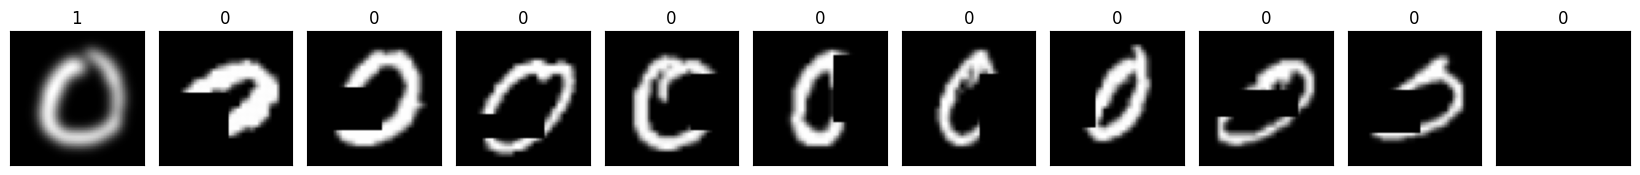

In [ ]:
make_image(full_dataset.iloc[1]['x'], full_dataset.iloc[1]['y'], showlabels=True)